## **Question 1**

Given a singly linked list, delete **middle** of the linked list. For example, if given linked list is 1->2->**3**->4->5 then linked list should be modified to 1->2->4->5.If there are **even** nodes, then there would be **two middle** nodes, we need to delete the second middle element. For example, if given linked list is 1->2->3->4->5->6 then it should be modified to 1->2->3->5->6.If the input linked list is NULL or has 1 node, then it should return NULL


In [12]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def deleteMiddleNode(head):
    if head is None or head.next is None:
        return None

    slow = head
    fast = head.next
    prev = None

    while fast and fast.next:
        prev = slow
        slow = slow.next
        fast = fast.next.next

    prev.next = slow.next

    return head

In [13]:
# Create the linked list 1->2->3->4->5
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

result = deleteMiddleNode(head)

# modified linked list
while result:
    print(result.val, end=" ")
    result = result.next

1 2 4 5 

## **Question 2**

Given a linked list of **N** nodes. The task is to check if the linked list has a loop. Linked list can contain self loop.



In [2]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def hasCycle(head):
    if head is None or head.next is None:
        return False

    slow = head
    fast = head

    while fast is not None and fast.next is not None:
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            return True

    return False


In [3]:
#for loop Linkedlist
head1 = ListNode(1)
head1.next = ListNode(2)
head1.next.next = ListNode(3)
head1.next.next.next = ListNode(4)
head1.next.next.next.next = head1.next  

print(hasCycle(head1)) 

#for without loop Linkedlist
head2 = ListNode(1)
head2.next = ListNode(2)
head2.next.next = ListNode(3)
head2.next.next.next = ListNode(4)

print(hasCycle(head2))  


True
False


## **Question 3**

Given a linked list consisting of **L** nodes and given a number **N**. The task is to find the **N**th node from the end of the linked list.



In [4]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def findNthFromEnd(head, N):
    if head is None:
        return None

    fast = head
    slow = head

   
    for _ in range(N):
        if fast is None:
            return None
        fast = fast.next

   
    while fast is not None:
        fast = fast.next
        slow = slow.next

    return slow


In [5]:

head = ListNode(10)
head.next = ListNode(5)
head.next.next = ListNode(100)
head.next.next.next = ListNode(5)


N = 5
result =findNthFromEnd(head, N)
if result is not None:
    print(result.val) 
else:
    print(-1)


-1


## **Question 4**

Given a singly linked list of characters, write a function that returns true if the given list is a palindrome, else false.

**Examples:**

**Input:** R->A->D->A->R->NULL

**Output:** Yes

**Input:** C->O->D->E->NULL

**Output:** No

In [24]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def isPalindrome(head):
    if head is None or head.next is None:
        return True

   # middle of the linked list
    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    # reverse the second half of the linked list
    second_half = reverseLinkedList(slow)

    # compare the first half with the reversed second half
    first_half = head
    while second_half:
        if first_half.val != second_half.val:
            return False
        first_half = first_half.next
        second_half = second_half.next

    return True

def reverseLinkedList(head):
    prev = None
    curr = head

    while curr:
        next_node = curr.next
        curr.next = prev
        prev = curr
        curr = next_node

    return prev

In [15]:
# Create the linked list R->A->D->A->R
head = ListNode('R')
head.next = ListNode('A')
head.next.next = ListNode('D')
head.next.next.next = ListNode('A')
head.next.next.next.next = ListNode('R')

result = isPalindrome(head)
print(result)

True


In [16]:
# Create the linked list C->O->D->E
head = ListNode('C')
head.next = ListNode('O')
head.next.next = ListNode('D')
head.next.next.next = ListNode('E')

result = isPalindrome(head)
print(result)  

False


## **Question 5**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.



In [17]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def removeLoop(head):
    if head is None or head.next is None:
        return head

    slow = head
    fast = head

   
    while fast is not None and fast.next is not None:
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            break

    
    if fast is None or fast.next is None:
        return head

   
    loopStart = head
    while loopStart.next != slow.next:
        loopStart = loopStart.next
        slow = slow.next

   
    loopStart.next = None

    return head


In [18]:
# Example: 1->2->3->4->5->2 (loop)
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)
head.next.next.next.next.next = head.next  

new_head = removeLoop(head)


current = new_head
while current is not None:
    print(current.val)
    current = current.next



1


## **Question 6**

Given a linked list and two integers M and N. Traverse the linked list such that you retain M nodes then delete next N nodes, continue the same till end of the linked list.
Input:
M = 2, N = 2
Linked List: 1->2->3->4->5->6->7->8
Output:
Linked List: 1->2->5->6

Input:
M = 3, N = 2
Linked List: 1->2->3->4->5->6->7->8->9->10
Output:
Linked List: 1->2->3->6->7->8

Input:
M = 1, N = 1
Linked List: 1->2->3->4->5->6->7->8->9->10
Output:
Linked List: 1->3->5->7->9


In [19]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def skipAndDelete(head, M, N):
    if not head:
        return head

    # Initialize pointers
    current = head
    prev = None

    # Traverse the linked list
    while current:
        # Skip M nodes
        for _ in range(M):
            if current:
                prev = current
                current = current.next
            else:
                break

        # Delete N nodes
        for _ in range(N):
            if current:
                current = current.next
            else:
                break

        # Link previous node to the next node after deletion
        if prev:
            prev.next = current

    return head



In [20]:
# Create the linked list 1->2->3->4->5->6->7->8
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)
head.next.next.next.next.next = ListNode(6)
head.next.next.next.next.next.next = ListNode(7)
head.next.next.next.next.next.next.next = ListNode(8)

M = 2
N = 2

result = skipAndDelete(head, M, N)

# the modified linked list
while result:
    print(result.val, end=" ")
    result = result.next

1 2 5 6 

## **Question 7**

Given two linked lists, insert nodes of second list into first list at alternate positions of first list.
For example, if first list is 5->7->17->13->11 and second is 12->10->2->4->6, the first list should become 5->12->7->10->17->2->13->4->11->6 and second list should become empty. The nodes of second list should only be inserted when there are positions available. For example, if the first list is 1->2->3 and second list is 4->5->6->7->8, then first list should become 1->4->2->5->3->6 and second list to 7->8.

Use of extra space is not allowed (Not allowed to create additional nodes), i.e., insertion must be done in-place. Expected time complexity is O(n) where n is number of nodes in first list.

In [21]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def insertAlternateNodes(first, second):
    if not second:
        return first

    current1 = first
    current2 = second

    while current1 and current2:
        first_next = current1.next
        second_next = current2.next

        current2.next = first_next
        current1.next = current2

        current1 = first_next
        current2 = second_next

    if current2:
        current1.next = current2

    return first


In [22]:
# Create the linked lists
first = ListNode(5)
first.next = ListNode(7)
first.next.next = ListNode(17)
first.next.next.next = ListNode(13)
first.next.next.next.next = ListNode(11)

second = ListNode(12)
second.next = ListNode(10)
second.next.next = ListNode(2)
second.next.next.next = ListNode(4)
second.next.next.next.next = ListNode(6)

# Call the function to insert alternate nodes
result = insertAlternateNodes(first, second)

# Print the modified first list
current = result
while current:
    print(current.val, end=" ")
    current = current.next


5 12 7 10 17 2 13 4 11 6 

## **Question 8**

Given a singly linked list, find if the linked list is circular or not.

A linked list is called circular if it is not NULL-terminated and all nodes are connected in the form of a cycle. Below is an example of a circular linked list.

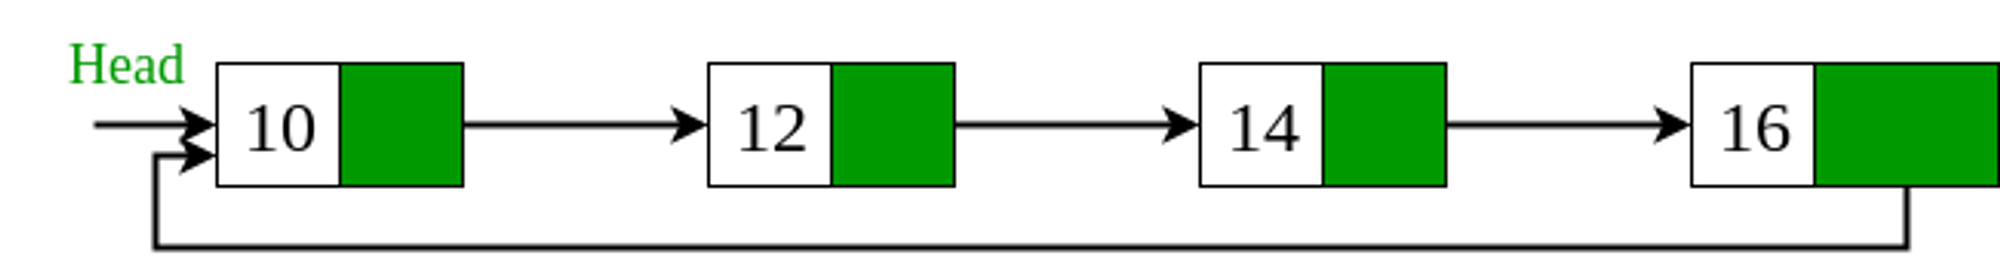

In [10]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def isCircular(head):
    if head is None:
        return False

    slow = head
    fast = head

    while fast is not None and fast.next is not None:
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            return True

    return False

In [23]:
head = ListNode(10)
head.next = ListNode(12)
head.next.next = ListNode(14)
head.next.next.next = ListNode(16)
head.next.next.next.next = ListNode(10)
head.next.next.next.next = head.next  

print(isCircular(head))

True
